Импортируем необходимые библиотеки

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Наш датасет содерижт два файла movie.csv и credits.csv

Посмотрим содержимое первых пяти строк файла movie.csv и credits.csv

In [255]:
data_movie = pd.read_csv('movie.csv')
data_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [256]:
data_credit = pd.read_csv('credits.csv')
data_credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# EDA

Проверим какие столбцы присутстствуют в в файле movie.csv

In [257]:
data_movie.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Опишем, что означает каждый столбец

* budget — Бюджет, в рамках которого был снят фильм.

* genre — Жанр фильма: боевик, комедия, триллер и т. д.

* homepage — Ссылка на официальный сайт фильма.

* id — Идентификатор фильма (совпадает с movie_id из первого набора данных).

* keywords — Ключевые слова или теги, связанные с фильмом.

* original_language — Язык, на котором изначально был снят фильм.

* original_title — Название фильма до перевода или адаптации.

* overview — Краткое описание сюжета фильма.

* popularity — Числовой показатель, отражающий популярность фильма.

* production_companies — Кинокомпании, участвовавшие в производстве фильма.

* production_countries — Страны, в которых был произведён фильм.

* release_date — Дата выхода фильма.

* revenue — Мировые кассовые сборы фильма.

* runtime — Продолжительность фильма в минутах.

* status — Статус фильма: "Вышел" или "Ожидается".

* tagline — Слоган фильма.

* title — Название фильма.

* vote_average — Средняя оценка, полученная фильмом.

* vote_count — Общее количество голосов, полученных фильмом.

Посмотрим на второй файл credits.csv

In [258]:
data_credit.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

* movie_id — Уникальный идентификатор для каждого фильма.

* cast — Имена главных и второстепенных актёров.

* crew — Имена членов съёмочной группы: режиссёра, монтажёра, композитора, сценариста и других.

Объединим два файла по ID

In [259]:
data_credit.columns = ['id','title','cast','crew']
data_all= data_movie.merge(data_credit,on='id')

Посмотрим на объеденённые данные

In [260]:
data_all.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Для задачи предсказания популярности трека столбец ID не несет никакой полезной информации, поэтому удалим его, также у нас образовались столбцы дубликаты title_x, title_y удалим один из них.

In [261]:
data = data_all.drop(['id','title_y'], axis = 1)
data.rename(columns={'title_x': 'title'}, inplace=True)
data.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

# Описание датасета фильмов
Размер датасета: 4803 строк (фильмов), 22 признака (столбца)

Целевая переменная: popularity — средняя оценка фильма

# Типы признаков:
## Числовые признаки (6):
budget — бюджет фильма (целое число)

popularity — популярность (вещественное число)

revenue — доход от проката (целое число)

runtime — продолжительность фильма в минутах (вещественное число)

vote_average — средняя оценка (вещественное число)

vote_count — количество голосов (целое число)

## Категориальные признаки (8):
original_language — язык оригинальной версии

status — статус фильма ("Released", "Rumored" и т. д.)

genres — жанры (может содержать несколько жанров, закодированы в строке/JSON)

production_companies — киностудии

production_countries — страны производства

spoken_languages — языки, на которых говорят персонажи

cast — актёрский состав (строка со списком актёров)

crew — съёмочная группа (строка с ролями и именами)

## Текстовые признаки (7):
original_title — оригинальное название

title_x, title_y — дубликаты названия фильма

overview — краткое описание фильма

tagline — слоган

keywords — ключевые слова, теги

homepage — ссылка на сайт фильма

release_date — дата выхода фильма

## Пропуски
Столбцы с пропусками:

* homepage — много пропусков (4803 → 1712)

* overview — 3 пропуска

* release_date — 1 пропуск

* runtime — 2 пропуска

* tagline — много пропусков (3959/4803)

Что делаем:

* homepage - нужно удалить, так как нерелевантно содержит URL сайта — для модели бесполезно

* overview - заполним пустой строкой

* release_date - удалим 1 строку

* runtime - заполнить медианным значением	Малое количество пропусков, медиана устойчива к выбросам

* tagline - заполним пустой строкой как overview

In [263]:
# удаление столбца homepage
data.drop(columns='homepage', inplace=True)

# заполнение overview и tagline
data['overview'] = data['overview'].fillna('')
data['tagline'] = data['tagline'].fillna('')

# удаление строки без даты
data = data.dropna(subset=['release_date'])

# заполнение runtime медианным значением
data['runtime'] = data['runtime'].fillna(data['runtime'].median())


Для числовых признаков выполним базовый первичный анализ с помощью метода describe()

In [264]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.802000e+03,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000
mean,2.905109e+07,21.496776,8.227777e+07,106.896501,6.093440,690.361724
std,4.072447e+07,31.818451,1.628697e+08,22.557033,1.191496,1234.674268
min,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,4.671734,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.924931,1.917498e+07,103.000000,6.200000,235.500000
75%,4.000000e+07,28.332017,9.291920e+07,117.750000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## untime (длительность фильма)

* Среднее значение: ~107 минут

* Минимальное: 0 (возможно, ошибка в данных — требует обработки)

* Максимальное: 338 минут (почти 6 часов, вероятно, редкий случай)

* Стандартное отклонение: около 25 минут — разброс средний, фильмы различаются по продолжительности, но без экстремальных выбросов.

* Вывод: значения 0 необходимо заменить на NaN, а признак может быть полезен для создания категорий («короткий», «средний», «длинный фильм»).

## budget (бюджет)
Среднее значение: очень высокое, но при этом

Медиана: довольно низкая, что говорит о том что большая часть фильмов мало бюджетная или бюджет и вовсе отсутствует, тоесть значение 0

Максимум: огромные значения, вероятно, блокбастеры

Вывод: нужно разобраться со значениями равными 0

📈 popularity
Распределение сильно смещено вправо:

Медиана — ~13

Максимум — 875 — вероятно, один или несколько вирусных хитов

Вывод: нормализация или логарифмирование могут быть полезны. Также стоит изучить выбросы.

🌟 vote_average и vote_count
vote_average: диапазон от 0 до 10, распределение похоже на нормальное

vote_count: также сильно смещено вправо, возможны выбросы

Вывод:

vote_count нуждается в логарифмировании

Можно создать бинарный признак: фильм вообще имеет рейтинг или нет (has_votes)

Общий вывод:
Некоторые признаки (например, budget, runtime) имеют аномальные значения (нули или экстремумы), что требует обработки.

Распределения части признаков не являются нормальными, есть выбросы.

Некоторые признаки могут потребовать нормализации.

### Подробнее посмотрим какие числовые признаки являются 0

In [265]:
data[['budget', 'revenue', 'runtime','popularity']].isin([0]).sum()

budget        1036
revenue       1426
runtime         34
popularity       0
dtype: int64

Мы видим что у  довольно большой части фильмов отсутсвует информация о бюджете и выручке. Так же есть небольшое число фильмов с неизвестной длительностью

Посмотрим есть ли у нас отсутвствующие данные для признаков придставленных списками

In [253]:
list_columns = ['genres', 'cast','production_companies','production_countries','spoken_languages'] 

for col in list_columns:
    empty_count = (data[col] == "[]").sum()
    print(f"Столбец '{col}': {empty_count} пустых списков")


Столбец 'genres': 27 пустых списков
Столбец 'cast': 42 пустых списков
Столбец 'production_companies': 350 пустых списков
Столбец 'production_countries': 173 пустых списков
Столбец 'spoken_languages': 85 пустых списков


In [226]:
# Количество уникальных значений в категориальных признаках
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"{col}: {data[col].nunique()} уникальных значений")


genres: 1175 уникальных значений
keywords: 4222 уникальных значений
original_language: 37 уникальных значений
original_title: 4800 уникальных значений
overview: 4800 уникальных значений
production_companies: 3697 уникальных значений
production_countries: 469 уникальных значений
release_date: 3280 уникальных значений
spoken_languages: 544 уникальных значений
status: 3 уникальных значений
tagline: 3945 уникальных значений
title: 4799 уникальных значений
cast: 4761 уникальных значений
crew: 4776 уникальных значений


Мы видем что у многих признаков почти все значение уникальные, это делает их малоэфективными для создание модели, тем неменее на основе их можно будет создать более подходящие признаки для работы

Посмотрим на распределение таргетной переменной

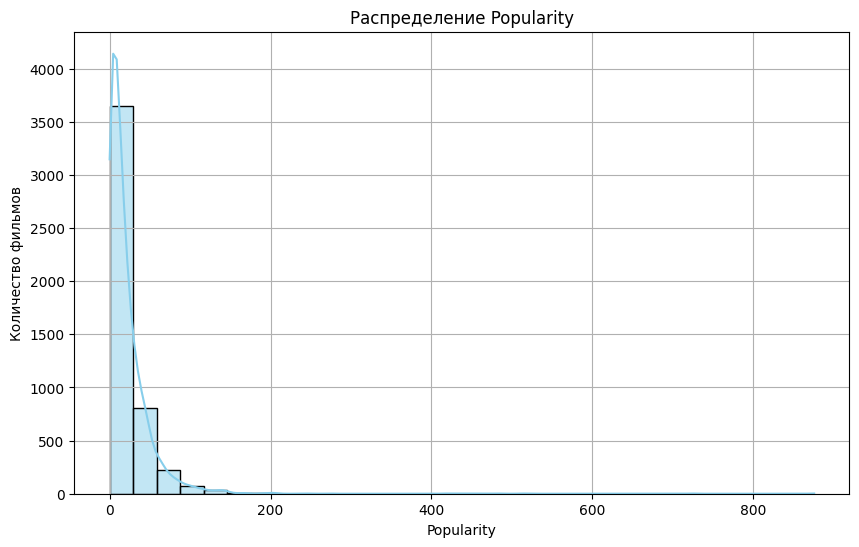

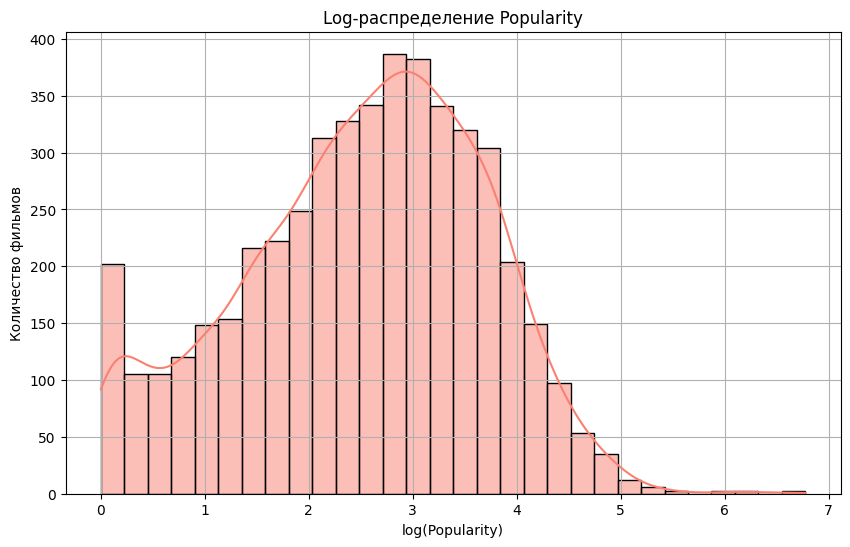

In [227]:
# Обычное распределение popularity
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True, color='skyblue')
plt.title('Распределение Popularity')
plt.xlabel('Popularity')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

# Логарифмическое распределение (игнорируем нули, если они есть)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(data['popularity']), bins=30, kde=True, color='salmon')
plt.title('Log-распределение Popularity')
plt.xlabel('log(Popularity)')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()

 Видим, что распределение popularity имеет выраженное смещение вправо: большинство фильмов имеют низкую популярность, а несколько выбиваются в суперхиты. Используем boxplot, чтобы лучше убедиться в этом

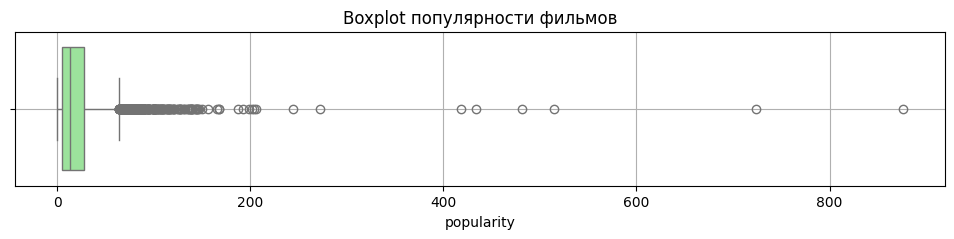

In [228]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=data['popularity'], color='lightgreen')
plt.title('Boxplot популярности фильмов')
plt.grid(True)
plt.show()


Подобная ситуация может потребовать логарифмирование признака при работе с моделью

Построим корреляционную матрицу, чтобы посмотреть на взаимосвязь числовых признаков

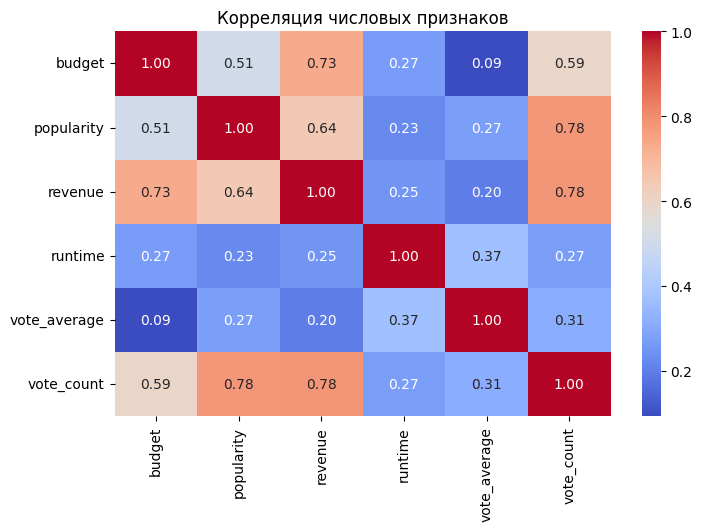

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем только числовые признаки
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Корреляционная матрица
corr = data[num_cols].corr()

# Отобразим только связи с popularity
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Корреляция числовых признаков')
plt.show()


НАПИСАТь ЧТО НИБУДЬЬ!

Text(0, 0.5, 'Жанр')

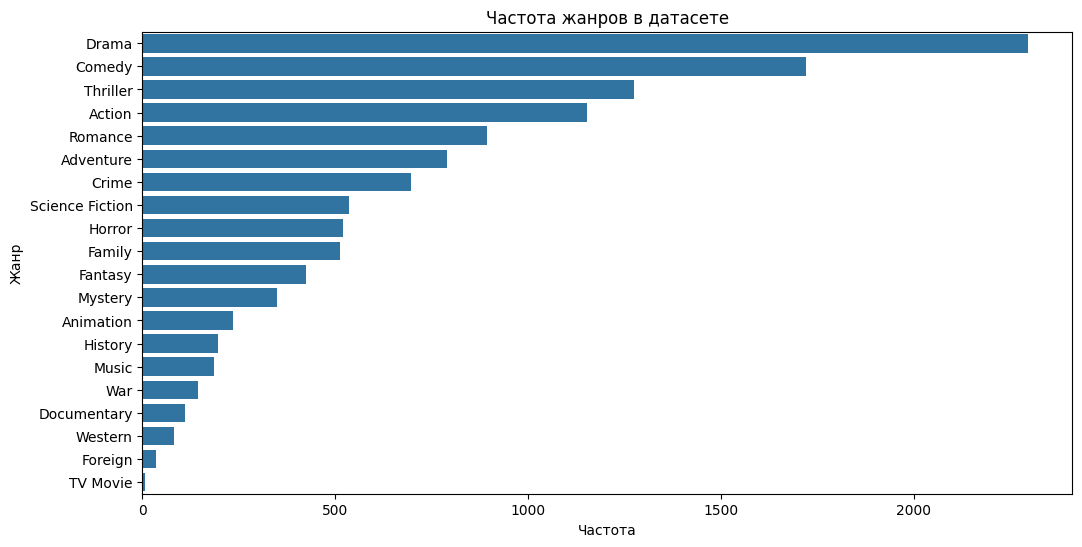

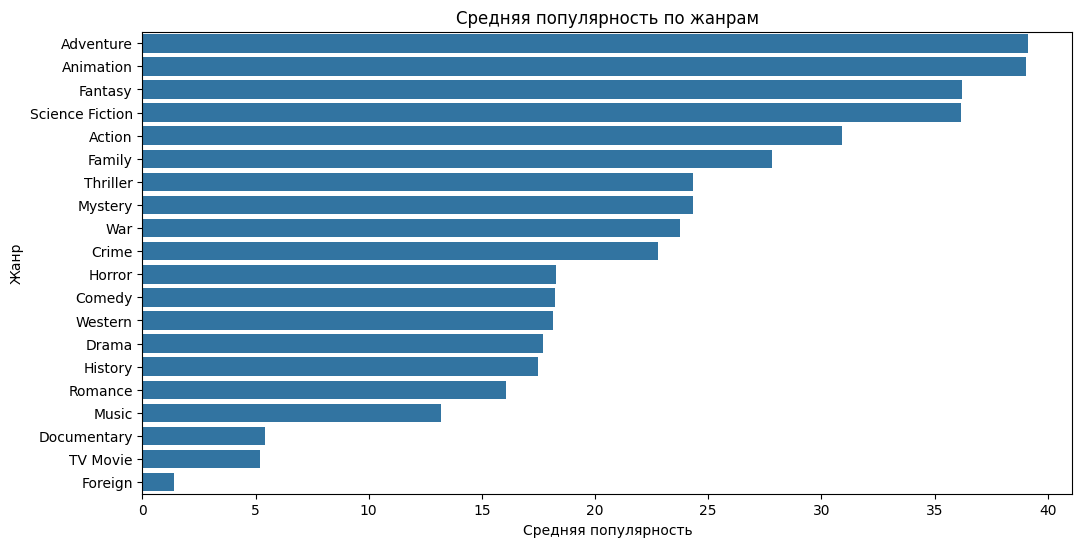

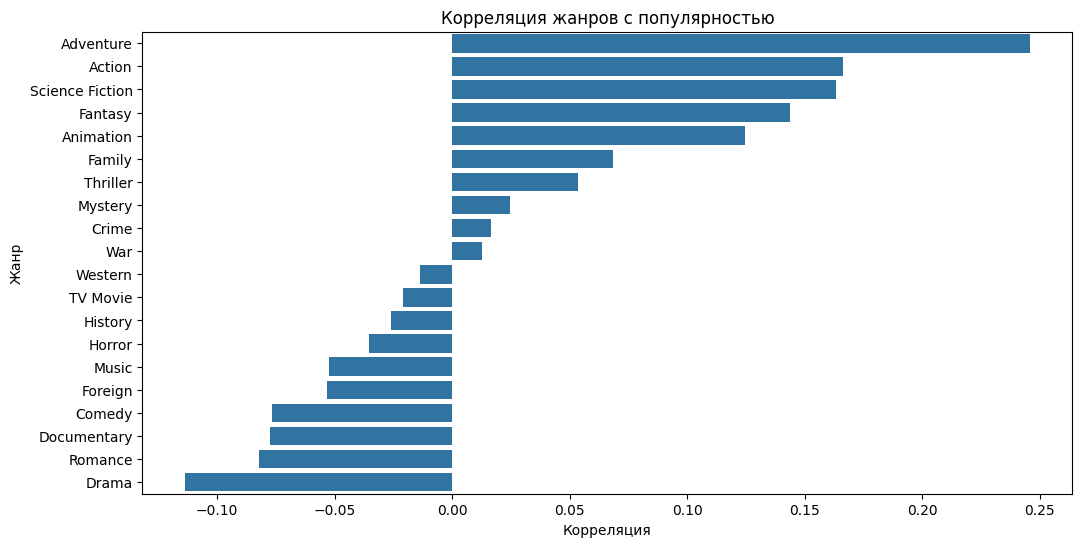

In [230]:
import ast

def extract_genres(text):
    try:
        genres = [d["name"] for d in ast.literal_eval(text)]
        return genres
    except:
        return []
 
data["genres_list"] = data["genres"].apply(extract_genres)

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(data["genres_list"]), columns=mlb.classes_)
data = pd.concat([data, genres_encoded], axis=1)

all_genres = data['genres_list'].explode()
genre_counts = all_genres.value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Частота жанров в датасете')
plt.xlabel('Частота')
plt.ylabel('Жанр')

genre_target_means = data[genres_encoded.columns].apply(
    lambda col: data['popularity'][col == 1].mean()
).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_target_means.values, y=genre_target_means.index)
plt.title('Средняя популярность по жанрам')
plt.xlabel('Средняя популярность')
plt.ylabel('Жанр')

correlations = data[genres_encoded.columns].corrwith(data['popularity']).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Корреляция жанров с популярностью')
plt.xlabel('Корреляция')
plt.ylabel('Жанр')

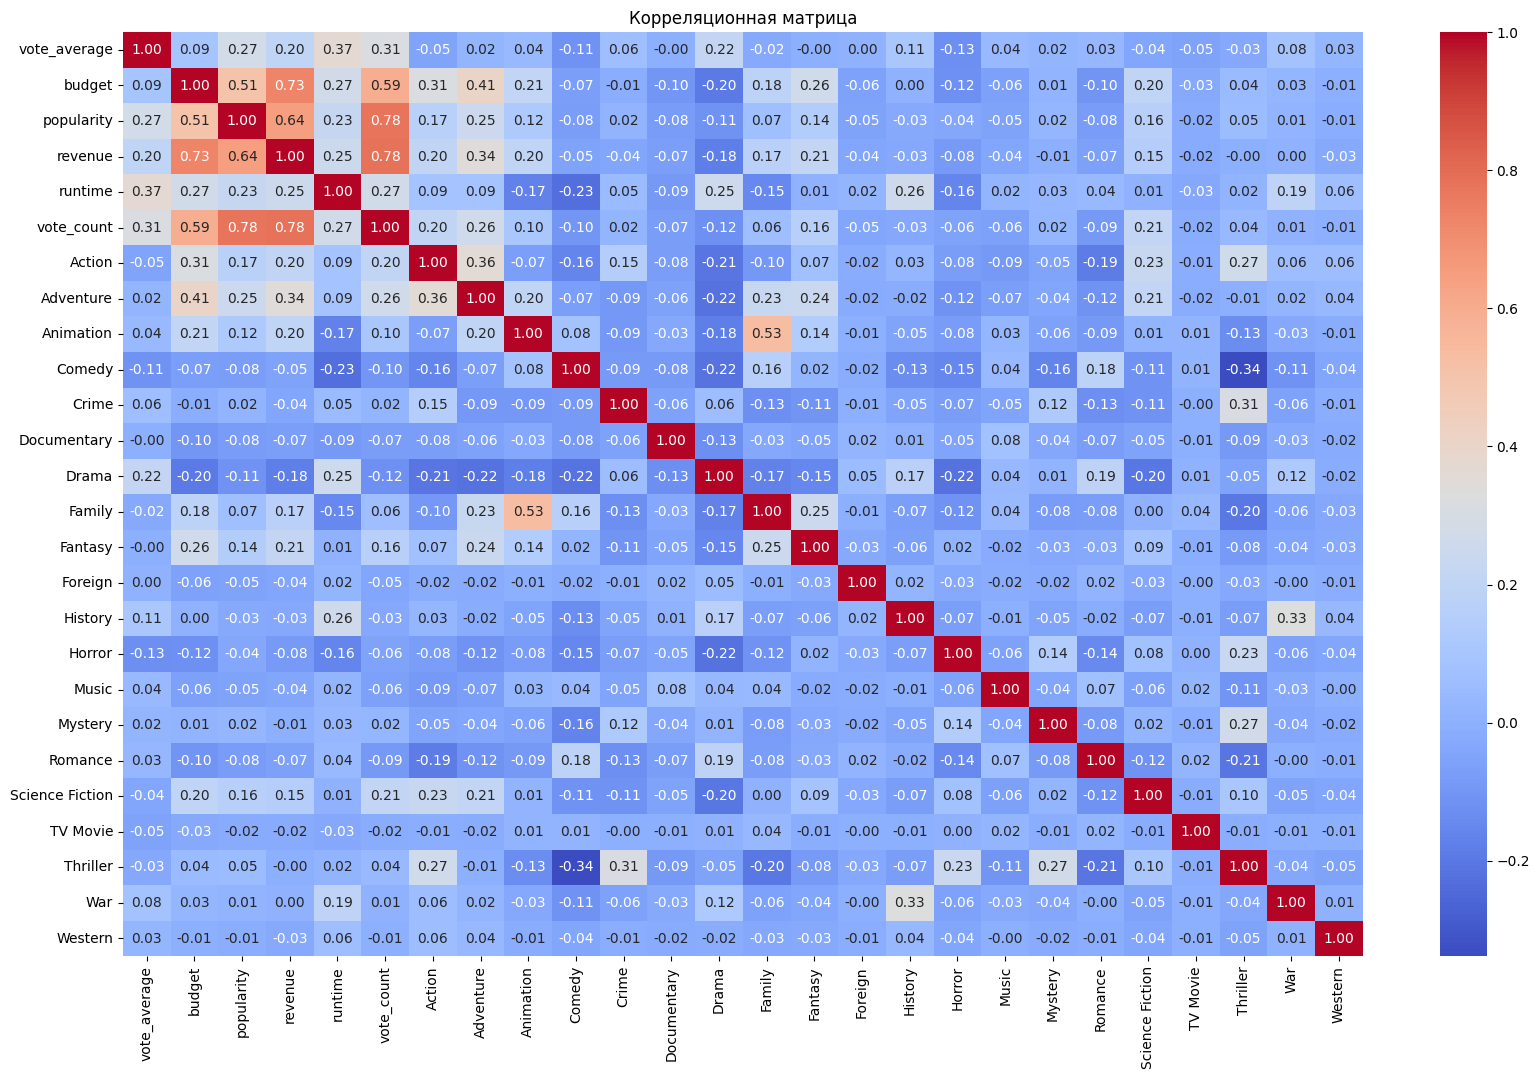

In [231]:
corr_all = data[[
    "vote_average", "budget", "popularity", "revenue", "runtime", "vote_count"
     
] + list(genres_encoded.columns) ].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_all, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


# Анализ матрицы корреляции по датасету фильмов:
Сильная положительная корреляция между budget и revenue (0.73)
Это ожидаемо: чем выше бюджет фильма, тем выше, как правило, его сборы. Однако стоит помнить, что это не абсолютное правило — есть и малобюджетные успешные фильмы.

Положительная корреляция между popularity и vote_count (0.78), а также revenue (0.64)
Популярные фильмы, предсказуемо, собирают больше голосов и денег. Это логично: чем больше людей о фильме знает — тем выше показатели.

runtime и vote_average (0.38)
Достаточно интересный момент: более длинные фильмы получают немного выше средний рейтинг. Возможно, это связано с тем, что длинные фильмы чаще бывают более серьёзными проектами.

Корреляция между budget и vote_count (0.59)
Фильмы с высоким бюджетом привлекают больше зрителей и, соответственно, получают больше оценок.

Жанры и бюджет/популярность:

Adventure и budget (0.41) — приключенческие фильмы часто дорогостоящие.

Action и budget (0.31) — боевики тоже обычно требуют немалых затрат.

Science Fiction и budget (0.20) — фантастика обычно дороже.

Интересная отрицательная корреляция budget с жанром Romance (-0.10)
Романтические фильмы, как правило, обходятся дешевле и не требуют крупных бюджетов.

Умеренная положительная связь runtime и жанра War (0.19)
Военные фильмы чаще получаются более продолжительными.

Не очень большая связь между vote_average и popularity (0.27)
Это означает, что популярность фильма слабо говорит о его среднем рейтинге. То есть популярные фильмы не всегда лучшие по оценкам.

Минимальная связь между жанрами и vote_average
Почти все жанры имеют слабую корреляцию с рейтингами, что говорит о том, что качество (по оценке зрителей) не сильно зависит от жанра.
Тем неменее историческии фильмы в среднем получают лучшие оценки, а хорор фильм худшиие

# Выводы:
Самая сильная связь — между бюджетом и кассовыми сборами.

Популярность фильма сильно связана с количеством голосов и выручкой.

Более длинные фильмы чуть лучше оцениваются.

Фильмы с крупным бюджетом чаще снимаются в популярных жанрах (приключения, боевик, фантастика).

Популярность ≠ высокий рейтинг.

Жанры почти не влияют на средний рейтинг.


Посмотрим на кореляцию с таргетной переменной

In [232]:
correlation_with_target = corr_all['popularity'].sort_values(ascending=False)
correlation_with_target

popularity         1.000000
vote_count         0.778114
revenue            0.644700
budget             0.505364
vote_average       0.273990
Adventure          0.245983
runtime            0.225398
Action             0.166226
Science Fiction    0.163392
Fantasy            0.143762
Animation          0.124680
Family             0.068545
Thriller           0.053541
Mystery            0.024834
Crime              0.016576
War                0.012562
Western           -0.013845
TV Movie          -0.020917
History           -0.026079
Horror            -0.035518
Music             -0.052322
Foreign           -0.053372
Comedy            -0.076682
Documentary       -0.077303
Romance           -0.081944
Drama             -0.113775
Name: popularity, dtype: float64

# Анализ корреляций с popularity

# Самые сильные корреляции:

vote_count(0.78) - Очень сильная, почти прокси для popularity. Прямое data leakage. Необходимо будет убрать

revenue(0.64) - Высокая связь. Поскольку кассовые сборы формируются после релиза, а в нашей задачи мы хотим создать модель которая будет пресказывать популярность до, необходимо будет удалить

budget(0.51) - Отличная объясняющая переменная.

# Умеренные корреляции:

vote_average(0.27) - Умеренная связь, но vote_average формируеться после выхода фильма что не подходит по смыслу задачи. Нужно удалить

Adventure(0.25) - Жанр Adventure связан с массовым прокатом. Полезная категориальная фича.

runtime(0.23) - Оставляем — в совокупности с жанрами даёт эффект.

Action, Sci-Fi, Fantasy, Animation(0.12 — 0.17) - Полезные жанровые признаки.

# Низкие корреляции и отрицательные корреляции

Comedy, Romance, Drama, Horror — умеренно отрицательные. 

status_encoded — практически нулевая. В дальнейшем лучше убрать

Проанализируем признак budget, учтем что мы обнаружили что у признаке присутсвет большое количество 0 значений

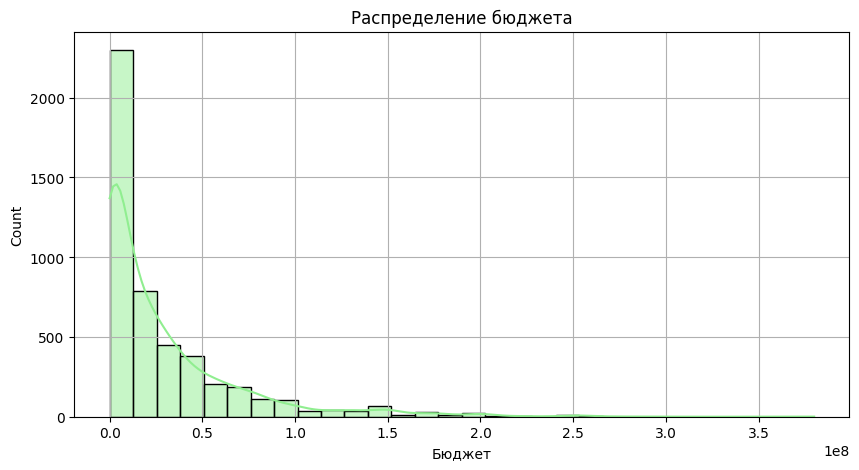

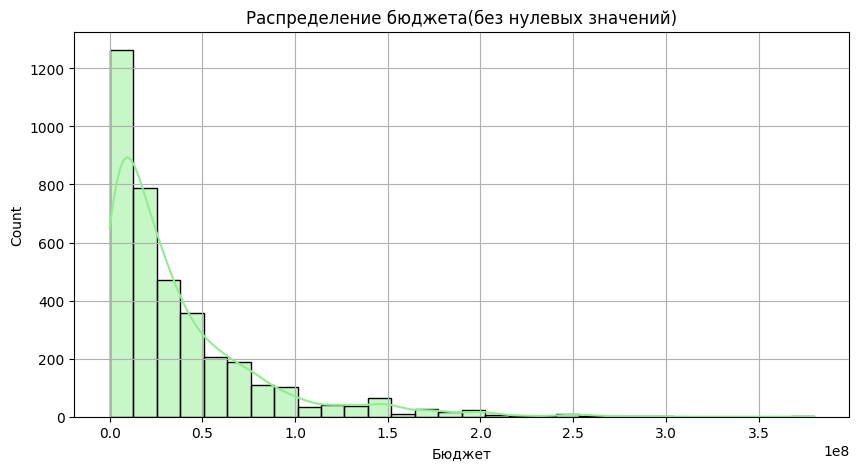

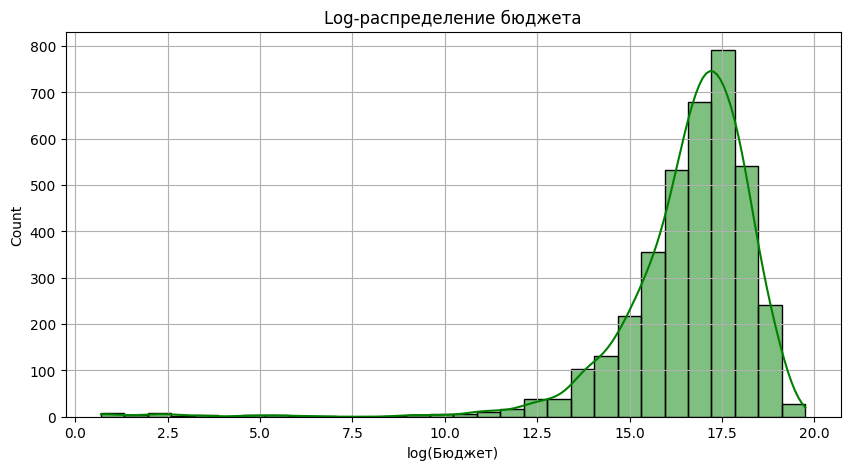

In [233]:
plt.figure(figsize=(10, 5))
sns.histplot(data['budget'], bins=30, kde=True, color='lightgreen')
plt.title('Распределение бюджета')
plt.xlabel('Бюджет')
plt.grid(True)
plt.show()

# Budget (исключим 0 значения)
plt.figure(figsize=(10, 5))
sns.histplot(data[data['budget'] > 0]['budget'], bins=30, kde=True, color='lightgreen')
plt.title('Распределение бюджета(без нулевых значений)')
plt.xlabel('Бюджет')
plt.grid(True)
plt.show()

# Логарифм бюджета
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(data[data['budget'] > 0]['budget']), bins=30, kde=True, color='green')
plt.title('Log-распределение бюджета')
plt.xlabel('log(Бюджет)')
plt.grid(True)
plt.show()


## Проанализируем полученные данные

Даже после исключения нулевых значений, значительная доля фильмов в выборке имеет крайне малый бюджет. Это свидетельствует о наличии большого числа малобюджетных проектов в датасете.

По мере увеличения бюджета количество фильмов последовательно снижается, что характерно для подобных данных: высокобюджетных фильмов существенно меньше.

Отдельно стоит отметить наличие локальных подъёмов числа фильмов на "круглых" значениях бюджета (например, 1 млн, 1.5 млн, 2 млн долларов и т.д.). Это может указывать на то, что в исходных данных значения бюджетов были предварительно округлены до определённых стандартных сумм при сборе или загрузке датасета.

Так же изучим распределение среднего рейтенга

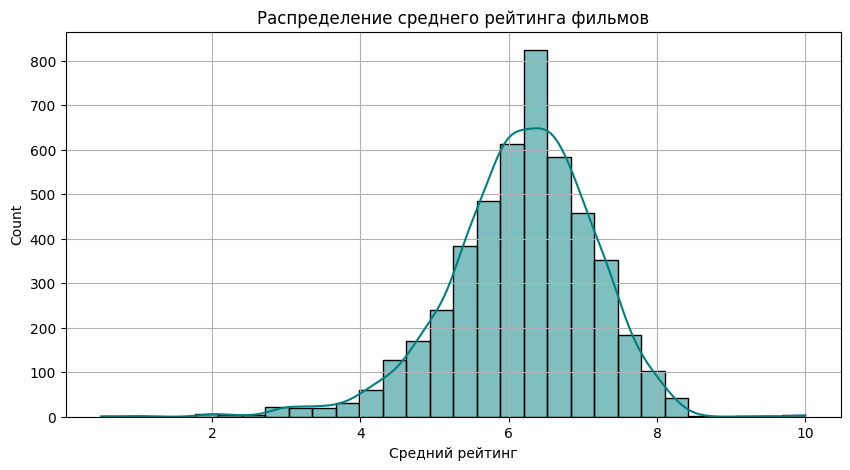

In [245]:


# Vote Average
plt.figure(figsize=(10, 5))
sns.histplot(data[data['vote_average'] > 0]['vote_average'], bins=30, kde=True, color='teal')
plt.title('Распределение среднего рейтинга фильмов')
plt.xlabel('Средний рейтинг')
plt.grid(True)
plt.show()

Распределение среднего рейтенга показывает, что среднее оценка превосходит 5, что говорит о том что люди склонны в целом оценивать фильмы выше среднего.

Проверим как на популрность влияет язык оригинала, для начала составим график распространенности языков

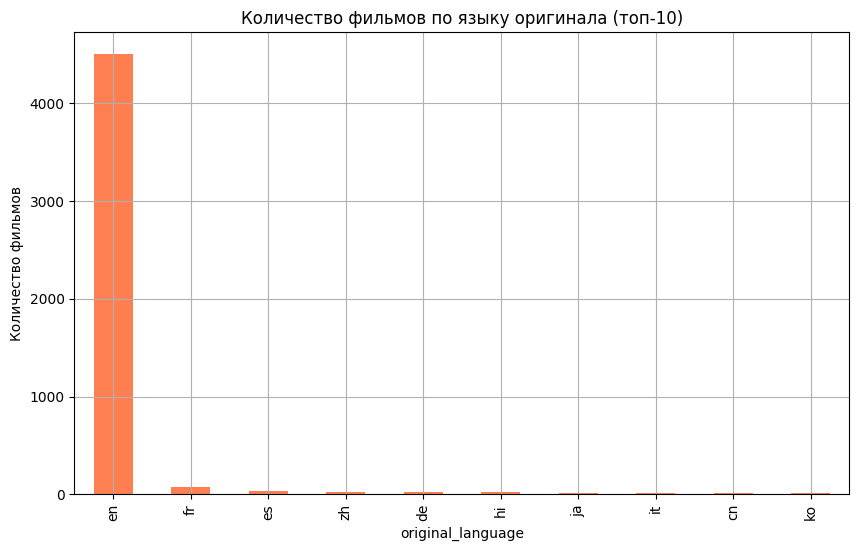

In [244]:
# Топ-10 языков по количеству фильмов
plt.figure(figsize=(10, 6))
data['original_language'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Количество фильмов по языку оригинала (топ-10)')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.show()


Как видно английский с огромным отрывом опережает все остальные языки, поэтому можно изучить как наличие английского языка влияет на популярность фильмом

Количество фильмов по группам:
lang_group
English    4504
Other       299
Name: count, dtype: int64

Средняя популярность по языкам:
lang_group
English    22.182359
Other      11.134820
Name: popularity, dtype: float64

Корреляция между английским языком и популярностью: 0.084


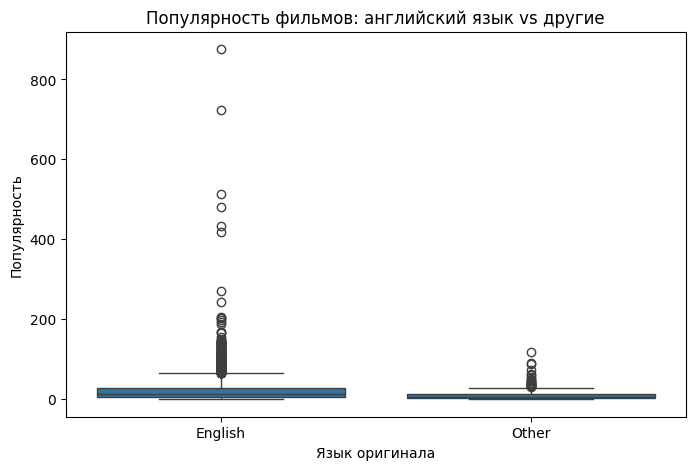

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Делим на группы: английский и другие
data['lang_group'] = data['original_language'].apply(lambda x: 'English' if x == 'en' else 'Other')

# 2. Считаем количество фильмов в каждой группе
lang_counts = data['lang_group'].value_counts()
print("Количество фильмов по группам:")
print(lang_counts)

# 3. Средняя популярность по группам
mean_popularity = data.groupby('lang_group')['popularity'].mean()
print("\nСредняя популярность по языкам:")
print(mean_popularity)

# 4. Корреляция (временное кодирование для расчёта корреляции)
lang_temp = data['lang_group'].map({'English': 1, 'Other': 0})
corr = lang_temp.corr(data['popularity'])
print(f"\nКорреляция между английским языком и популярностью: {corr:.3f}")

# 5. Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='lang_group', y='popularity', data=data)
plt.title('Популярность фильмов: английский язык vs другие')
plt.xlabel('Язык оригинала')
plt.ylabel('Популярность')
plt.show()

# Удалим временный столбец (если не нужен дальше)
data.drop(columns='lang_group', inplace=True)


Можно заметить, что не анлийских фильмов очень мало, а те что присутствуют в дата сете склоны быть менее популрны

Посмотрим на корреляцию популярности в зависимости от того снимался ли фильм известной компанией или в нём есть известный актер

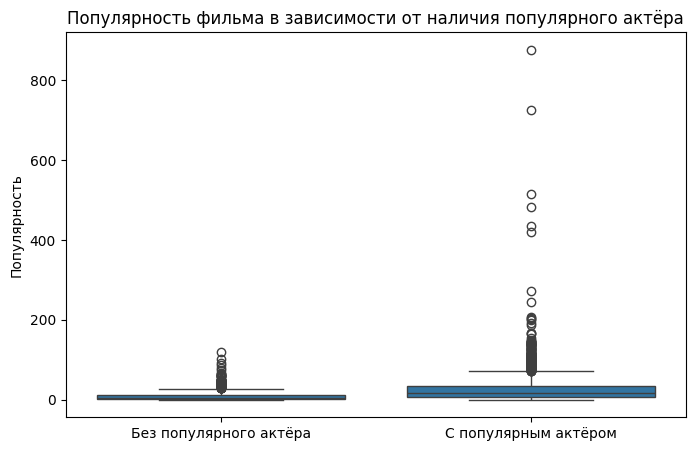

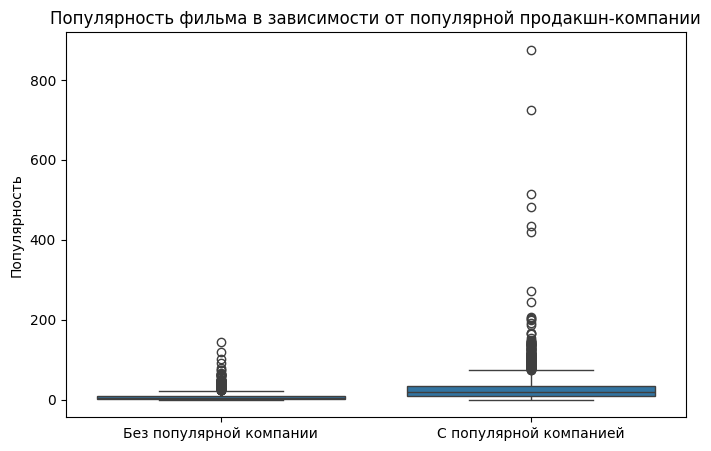

In [237]:
import pandas as pd
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# --- Функция для извлечения имён из JSON-подобной строки ---
def extract_names(text):
    try:
        return [d['name'] for d in ast.literal_eval(text)]
    except:
        return []

# --- Применяем к нужным столбцам ---
data["company_list"] = data["production_companies"].apply(extract_names)
data["cast_list"] = data["cast"].apply(extract_names)

# --- Собираем все имена ---
all_companies = [company for sublist in data["company_list"] for company in sublist]
all_actors = [actor for sublist in data["cast_list"] for actor in sublist]

# --- Считаем частоту появления ---
company_counts = Counter(all_companies)
actor_counts = Counter(all_actors)

# --- Задаём "популярных" по порогу ---
top_companies = set(name for name, count in company_counts.items() if count >= 10)
top_actors = set(name for name, count in actor_counts.items() if count >= 15)

# --- Временные бинарные метки для анализа ---
data["has_popular_actor"] = data["cast_list"].apply(lambda cast: any(actor in top_actors for actor in cast))
data["has_popular_company"] = data["company_list"].apply(lambda companies: any(c in top_companies for c in companies))

# --- Визуализация: наличие популярного актёра vs популярность ---
plt.figure(figsize=(8,5))
sns.boxplot(x="has_popular_actor", y="popularity", data=data)
plt.xticks([0, 1], ['Без популярного актёра', 'С популярным актёром'])
plt.title("Популярность фильма в зависимости от наличия популярного актёра")
plt.xlabel("")
plt.ylabel("Популярность")
plt.show()

# --- Визуализация: наличие популярной компании vs популярность ---
plt.figure(figsize=(8,5))
sns.boxplot(x="has_popular_company", y="popularity", data=data)
plt.xticks([0, 1], ['Без популярной компании', 'С популярной компанией'])
plt.title("Популярность фильма в зависимости от популярной продакшн-компании")
plt.xlabel("")
plt.ylabel("Популярность")
plt.show()


Можно видеть, что все супер хиты были сняты популярными актерами и известной компанией, кроме того среднее популярность у фильмов где есть популярной актери или они сняты популярной компанией тоже выше

Посмтрим как изменяеться популярность фильма в зависимсоти от его длительности и изучим признак runtime

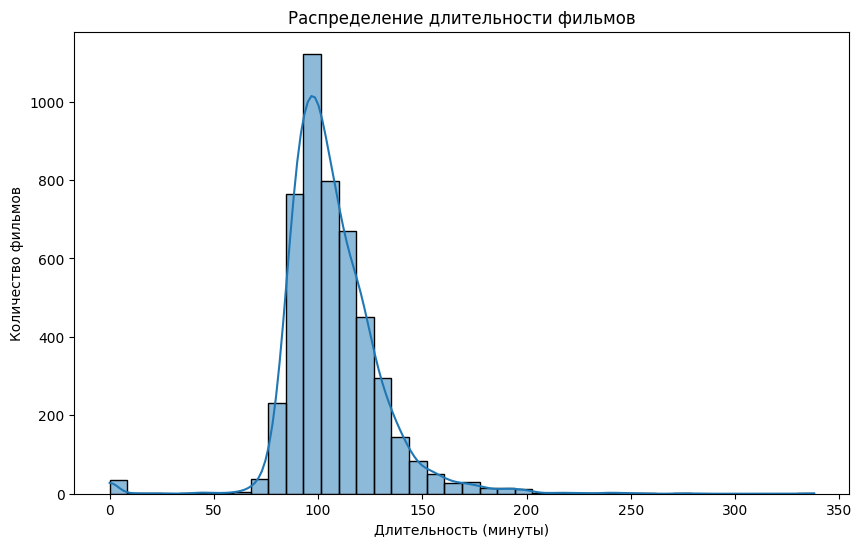

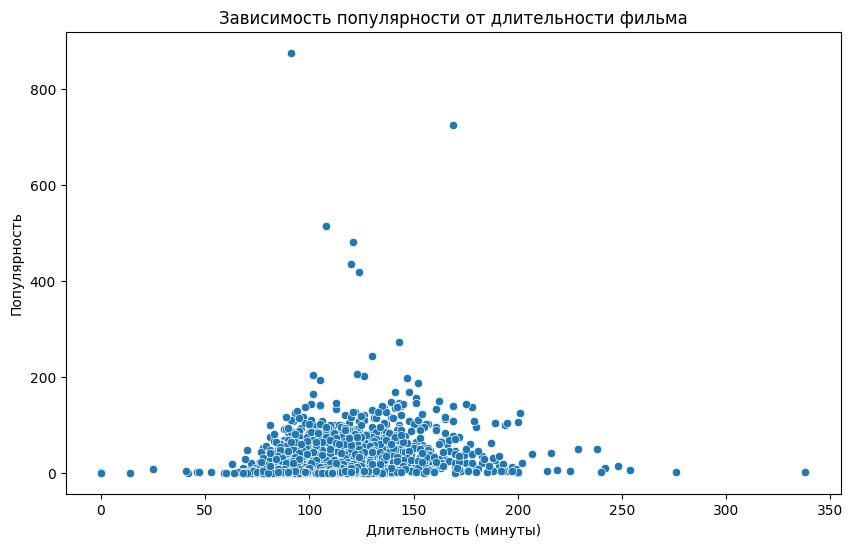

Количество фильмов в каждой категории:
runtime_category
medium    3110
long       988
short      704
Name: count, dtype: int64

Средняя популярность по группам:
runtime_category
long      34.542553
medium    19.498598
short     12.015393
Name: popularity, dtype: float64

Корреляция каждой категории с популярностью:
long      0.208701
medium   -0.085149
short    -0.123520
dtype: float64


In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data['runtime'].dropna(), bins=40, kde=True)
plt.title('Распределение длительности фильмов')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Количество фильмов')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data.dropna(subset=['runtime', 'popularity']),
    x='runtime', y='popularity'
)
plt.title('Зависимость популярности от длительности фильма')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Популярность')
plt.show()

# 1. Создаём категорию по длительности:
def categorize_runtime(runtime):
    if pd.isna(runtime):
        return
    elif runtime < 90:
        return 'short'
    elif runtime <= 120:
        return 'medium'
    else:
        return 'long'

data['runtime_category'] = data['runtime'].apply(categorize_runtime)

# 2. Считаем количество фильмов в каждой категории:
runtime_counts = data['runtime_category'].value_counts()
print("Количество фильмов в каждой категории:")
print(runtime_counts)

# 3. Средняя популярность по каждой группе:
popularity_by_group = data.groupby('runtime_category')['popularity'].mean()
print("\nСредняя популярность по группам:")
print(popularity_by_group)

# 4. Кодируем группы в бинарные колонки для корреляции:
runtime_dummies = pd.get_dummies(data['runtime_category'])
correlations = runtime_dummies.apply(lambda col: data['popularity'].corr(col))

print("\nКорреляция каждой категории с популярностью:")
print(correlations)




На графике runtime мы видем небольшое количество фильмов с длительностью 0, которые говорят о том что для этих фильмов длительность не указана.
Так же заметно что большенство фильмов имееют длительность в диапозоне 90 - 120 минут тоесть попадают в категорию medium. 
По данным можно сделать вывод что более длительные фильмы склоны быть более поулярными

Проверим влияет ли длина названия фильма на его популярность

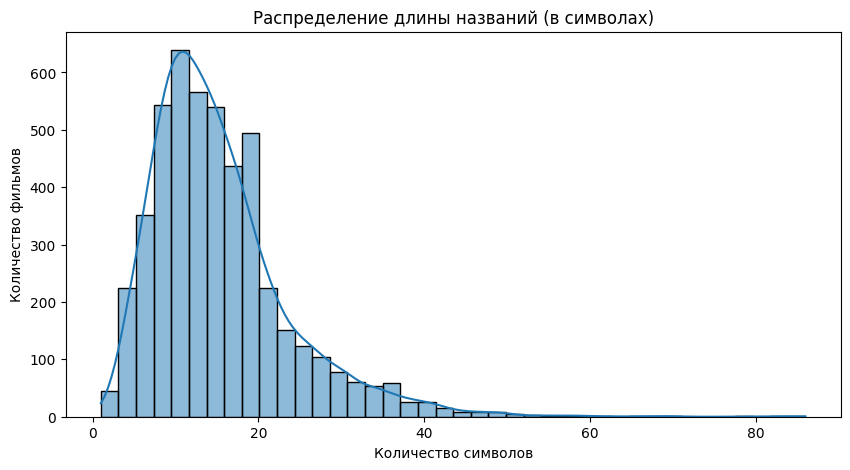

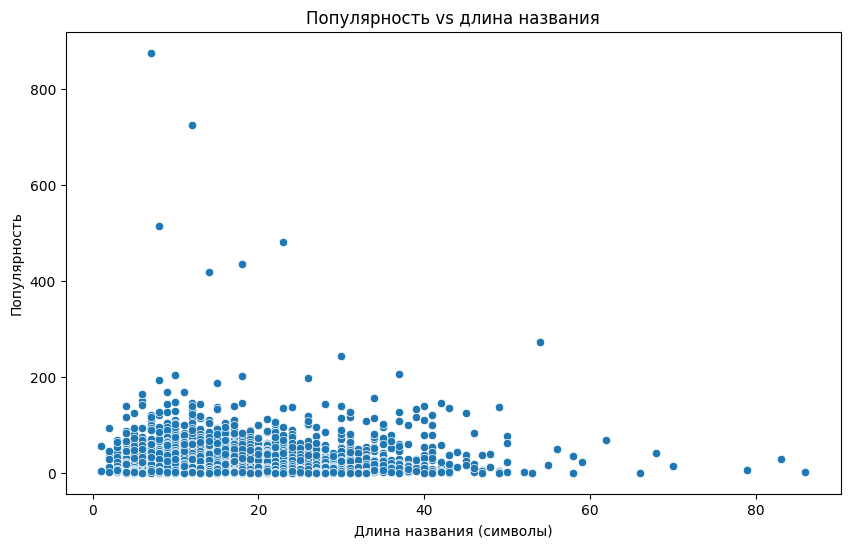

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# Убедимся, что поле title строковое
data['title'] = data['title'].astype(str)

# 1. Длина названия в символах
data['title_length_chars'] = data['title'].apply(len)

# 2. Количество слов в названии
data['title_word_count'] = data['title'].apply(lambda x: len(x.split()))

# 3. Распределение длины в символах
plt.figure(figsize=(10,5))
sns.histplot(data['title_length_chars'], bins=40, kde=True)
plt.title('Распределение длины названий (в символах)')
plt.xlabel('Количество символов')
plt.ylabel('Количество фильмов')
plt.show()

# 4. Популярность в зависимости от длины названия
plt.figure(figsize=(10,6))
sns.scatterplot(x='title_length_chars', y='popularity', data=data)
plt.title('Популярность vs длина названия')
plt.xlabel('Длина названия (символы)')
plt.ylabel('Популярность')
plt.show()

Можно заметить, что большенство фильмов используют не очень большие название до 20 символов, а популярноть почти никак не связанна с длиной названия

Посмотрим на каких языках говорят в фильмах и как это влияет на их популярность

Топ-10 языков:
[('en', 4485), ('fr', 437), ('es', 351), ('de', 262), ('it', 188), ('ru', 185), ('zh', 107), ('ja', 97), ('pt', 68), ('ar', 67)]


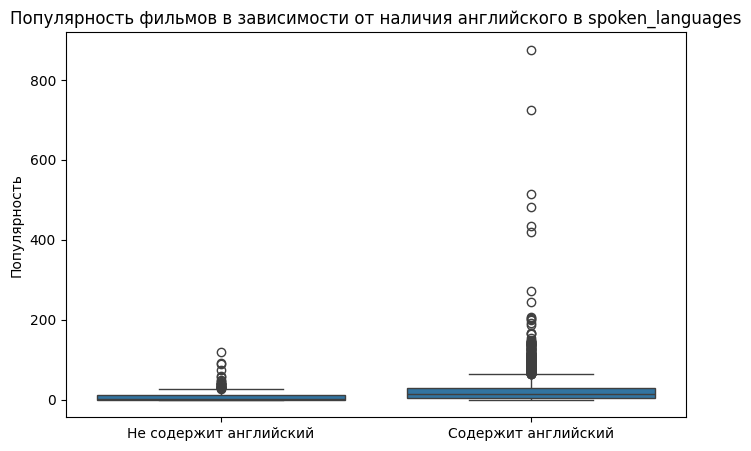

Корреляция между speaks_english и популярностью: 0.107


In [240]:
import ast
from collections import Counter

# Распарсим языки
data['spoken_lang_list'] = data['spoken_languages'].apply(
    lambda x: [d['iso_639_1'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

# Подсчитаем самые частые языки
all_langs = [lang for sublist in data['spoken_lang_list'] for lang in sublist]
lang_counts = Counter(all_langs)
top_langs = lang_counts.most_common(10)
print("Топ-10 языков:")
print(top_langs)

# Временный признак: есть ли английский среди spoken_languages
data['speaks_english'] = data['spoken_lang_list'].apply(lambda langs: 'en' in langs)

# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='speaks_english', y='popularity', data=data)
plt.xticks([0, 1], ['Не содержит английский', 'Содержит английский'])
plt.title('Популярность фильмов в зависимости от наличия английского в spoken_languages')
plt.ylabel('Популярность')
plt.xlabel('')
plt.show()

# Корреляция
corr = data['speaks_english'].astype(int).corr(data['popularity'])
print(f"Корреляция между speaks_english и популярностью: {corr:.3f}")



Языки которые содержат анлийский в среднем более попуярные, а все хиты которые есть в дата сете на английском

Посмотрим на признак country_list и изучим как производство фильма в разных странная влияет на его популярность

Топ-5 стран: ['United States of America', 'United Kingdom', 'Germany', 'France', 'Canada']


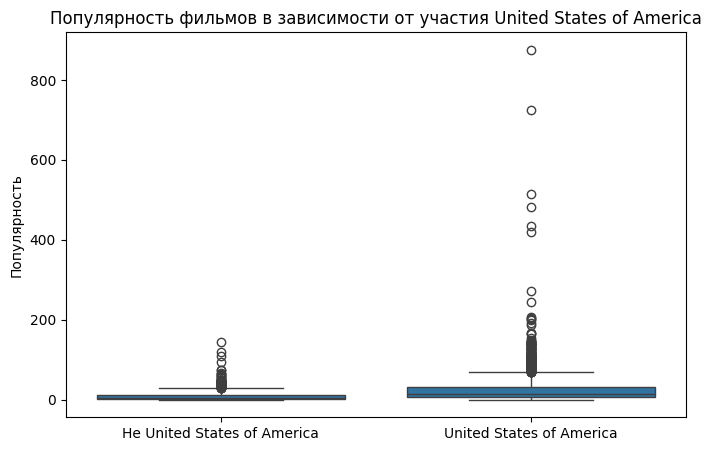

Корреляция между производством в United States of America и популярностью: 0.169


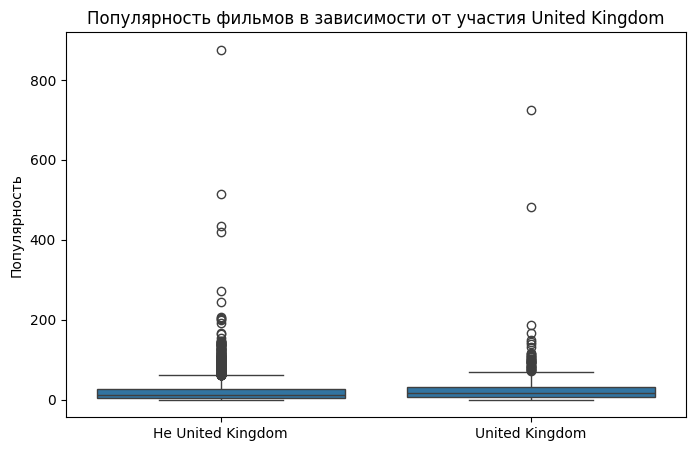

Корреляция между производством в United Kingdom и популярностью: 0.057


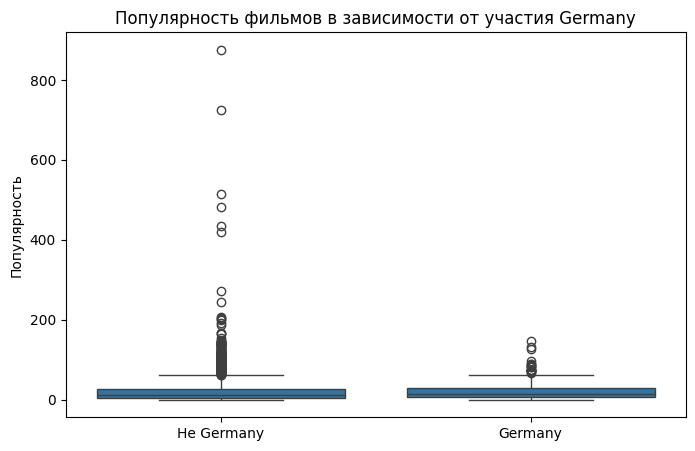

Корреляция между производством в Germany и популярностью: 0.010


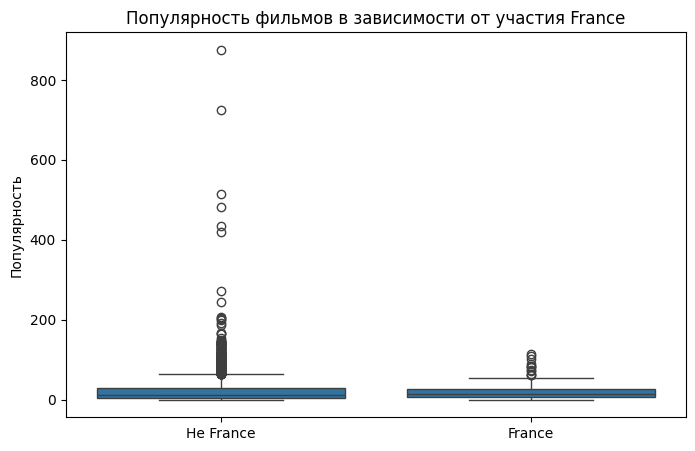

Корреляция между производством в France и популярностью: -0.019


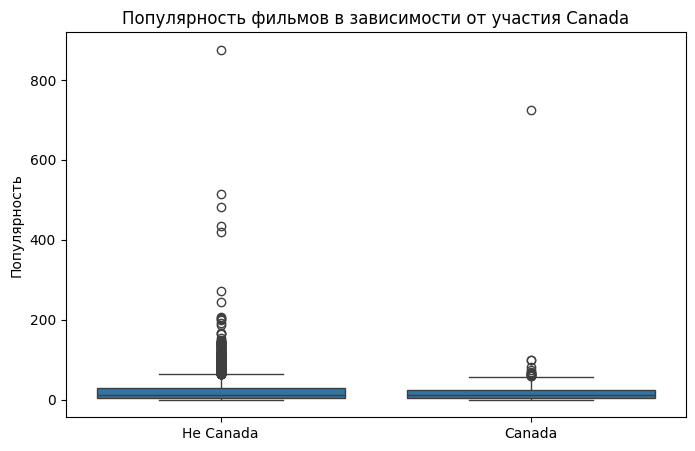

Корреляция между производством в Canada и популярностью: -0.006


In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

# Шаг 1: Преобразуем строку JSON в список стран по коду или названию
data['country_list'] = data['production_countries'].apply(
    lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])

# Шаг 2: Подсчитаем частоту всех стран
all_countries = [country for sublist in data['country_list'] for country in sublist]
country_counts = Counter(all_countries)
top_countries = [country for country, _ in country_counts.most_common(5)]
print("Топ-5 стран:", top_countries)

# Шаг 3: Добавим бинарные признаки для топ-5 стран
for country in top_countries:
    data[f'produced_in_{country}'] = data['country_list'].apply(lambda countries: country in countries)

# Шаг 4: Нарисуем boxplot для каждой страны и посчитаем корреляцию
for country in top_countries:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[f'produced_in_{country}'], y=data['popularity'])
    plt.xticks([0, 1], [f'Не {country}', country])
    plt.title(f'Популярность фильмов в зависимости от участия {country}')
    plt.xlabel('')
    plt.ylabel('Популярность')
    plt.show()
    
    corr = data[f'produced_in_{country}'].astype(int).corr(data['popularity'])
    print(f"Корреляция между производством в {country} и популярностью: {corr:.3f}")


Из полученных данных видно что если фильм сделан в США то он в среднем будет популярнее, что не удивительно учитывая что большая часть известных студий и актеров из америки

Проверим как длина описания влияет на популярность фильма. Может быть более короткие и просые описания будт популярнее, чем длинные

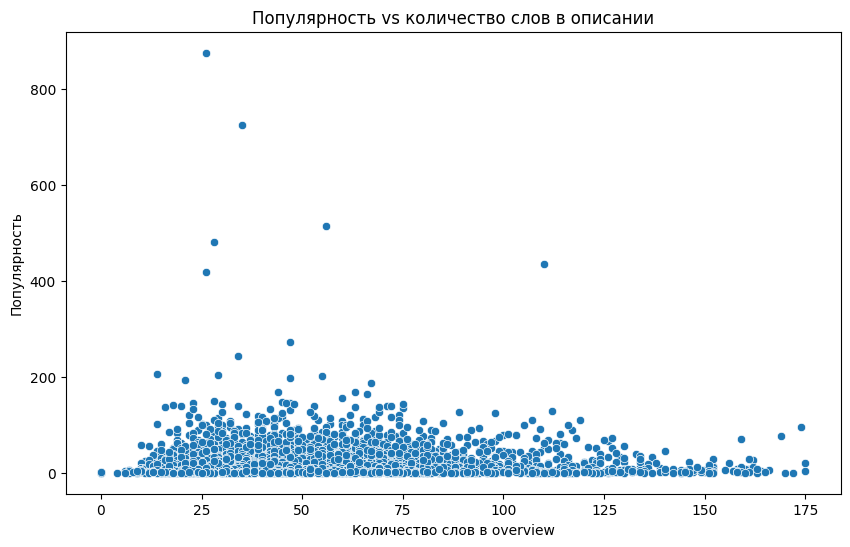

Корреляция с длиной описания (символы): -0.010
Корреляция с длиной описания (слова): -0.011


In [248]:
# Убедимся, что поле строковое
data['overview'] = data['overview'].fillna('').astype(str)

# 1. Длина описания (в символах)
data['overview_char_len'] = data['overview'].apply(len)

# 2. Количество слов
data['overview_word_count'] = data['overview'].apply(lambda x: len(x.split()))

# 3. Boxplot: длина описания vs популярность
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(x='overview_word_count', y='popularity', data=data)
plt.title('Популярность vs количество слов в описании')
plt.xlabel('Количество слов в overview')
plt.ylabel('Популярность')
plt.show()

# 4. Корреляции
corr_chars = data['overview_char_len'].corr(data['popularity'])
corr_words = data['overview_word_count'].corr(data['popularity'])
print(f"Корреляция с длиной описания (символы): {corr_chars:.3f}")
print(f"Корреляция с длиной описания (слова): {corr_words:.3f}")


Как видно кореляция между длиной описания и популярнстью фильма отрицательна и очень мала

Рассмотрим как ключевые слова влияют на популярность. Посмотрем сначала на то как количество ключевых слов корелируют с популярностью, а потом выберем топ 20 самых популярных ключевых слов

📊 Корреляция между числом keyword'ов и популярностью:
0.29539621614939615

📊 Корреляция между числом top-20 keyword'ов и популярностью:
0.1554533205228745

📊 Средняя популярность для фильмов с хотя бы одним топ-20 keyword:
has_top_keyword
0    18.179926
1    25.577750
Name: popularity, dtype: float64


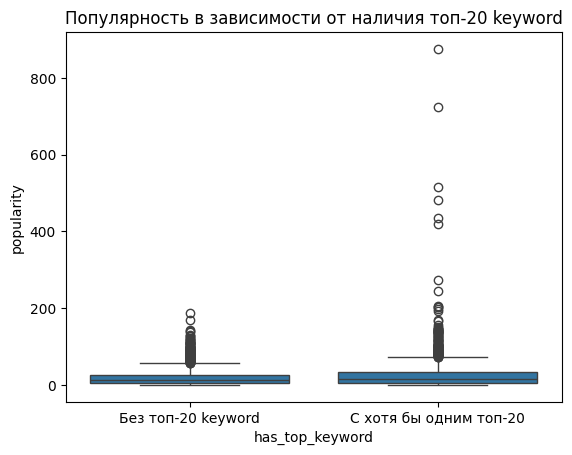

🎬 Фильмы с хотя бы одним топ-20 keyword: 2153
🎬 Фильмы без ни одного топ-20 keyword: 2650


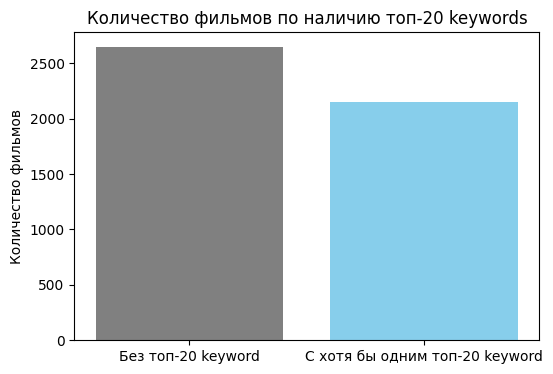

In [249]:
import pandas as pd
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Преобразуем колонку 'keywords' в список слов ---
def extract_keywords(x):
    try:
        parsed = ast.literal_eval(x)
        return [d['name'] for d in parsed if 'name' in d]
    except:
        return []

data['keyword_list'] = data['keywords'].apply(extract_keywords)
data['keyword_count'] = data['keyword_list'].apply(len)

# --- 2. Посчитаем топ-20 самых частых keywords ---
all_keywords = [kw for sublist in data['keyword_list'] for kw in sublist]
top_20_keywords = [kw for kw, _ in Counter(all_keywords).most_common(20)]

# --- 3. Посчитаем сколько из топ-20 keyword'ов есть в каждом фильме ---
def count_top_keywords(kw_list):
    return sum(1 for kw in kw_list if kw in top_20_keywords)

data['top_keyword_count'] = data['keyword_list'].apply(count_top_keywords)
data['has_top_keyword'] = data['top_keyword_count'].apply(lambda x: int(x > 0))

# --- 4. Корреляции ---
print("📊 Корреляция между числом keyword'ов и популярностью:")
print(data['keyword_count'].corr(data['popularity']))

print("\n📊 Корреляция между числом top-20 keyword'ов и популярностью:")
print(data['top_keyword_count'].corr(data['popularity']))

print("\n📊 Средняя популярность для фильмов с хотя бы одним топ-20 keyword:")
print(data.groupby('has_top_keyword')['popularity'].mean())

# --- 5. Визуализация ---
sns.boxplot(x=data['has_top_keyword'], y=data['popularity'])
plt.xticks([0, 1], ['Без топ-20 keyword', 'С хотя бы одним топ-20'])
plt.title("Популярность в зависимости от наличия топ-20 keyword")
plt.show()

# Считаем количество фильмов в каждой категории
counts = data['has_top_keyword'].value_counts().sort_index()

# Вывод в виде текста
print(f"🎬 Фильмы с хотя бы одним топ-20 keyword: {counts.get(1, 0)}")
print(f"🎬 Фильмы без ни одного топ-20 keyword: {counts.get(0, 0)}")

# Визуализация
import matplotlib.pyplot as plt

labels = ['Без топ-20 keyword', 'С хотя бы одним топ-20 keyword']
values = [counts.get(0, 0), counts.get(1, 0)]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['gray', 'skyblue'])
plt.title('Количество фильмов по наличию топ-20 keywords')
plt.ylabel('Количество фильмов')
plt.show()



Мы видим что количество ключевых слов и наличие популярного напрямую корелируют с популярностью

# Вывод по EDA

* В дата сете большое число признаков, которые не релеванты из - за того что имееют уникльные значения, но на основе их можно создать более подходящие признаки

* У многих признаков есть большое количество пустых или незначаших значей как у числовых признаков, так и категориальных

* Большенство фильмов не популярны, так же есть несколько супер хитов. Средняя популярность 21.5, а максимальная 875.5.

* Самые распространенные жанры Drama, Comedy, Thriller

* Самая большая кореляция с популярностью у Adventure и Action

* Посмыслу задачи нам не подходят признаки vote_count, revenue, vote_average

* 99% процентов фильмов имееют статус relesed, поэтому признак status_encoded нерепрезентативный

* Большенство фильмов имееют низкий бюджет, так же бюджет имеет подъемы поулярности на круглых значениях тоесть на (1.5 млн, 2 млн, 2.5 млн)

* Средний рейтинг фильмов примерно 6.1

* Большенство фильмов сняты на английском или имеют английский перевод, не английские фильмы обычно менее популярны

* Известные компании и актеры увеличивают увеличивают популярность фильма

* США выпускает наиболее популярные фильмы

* Большенство фильмов обладаюет длинной от 90 до 120 минут. Длинные фильмы в среднем более популярные

* Длина названия или его описания почти не влияет на популярность фильма

* Чем больше ключевых слов у фильма, чем он обычно популярнее, так же наличие наиболее распространные ключевых слов, дает положительную кореляцию с популярностью

# Создание новых признаков

# Подбор и подготовка признаков
Выберем признакои которые будем использовать в модели подготовим их, создадим новые, а так же удалим ненужные
## Подготовка дата сета
После изучение дата сета мы увидели что в нем есть ряд проблемм которые необходимо исправить для корректной работы.

### Нулевые значение в дата сете
budget — 0 как пропуск, испльзуем код для замены на медианное значение по жанру, если жанр не указан используем просто медианное значение 

revenue — 0 как пропуск, признак revenue можно узнать только после проката фильма, это не подходит нам, поэтому его удаляем

runtime — 0 как пропуск, нулей не слишком много, поэтому мы можем заменить их медианными значениями

In [47]:
import ast

# удаление revenue
data.drop(columns='revenue', inplace=True)

# заменим нули в runtime на медиану
data.loc[data['runtime'] == 0, 'runtime'] = data['runtime'].median()

# Получаем основной жанр
def get_main_genre(genres):
    try:
        genres_list = ast.literal_eval(genres)
        return genres_list[0]['name'] if genres_list else 'Unknown'
    except:
        return 'Unknown'

data['main_genre'] = data['genres'].apply(get_main_genre)

# Бинарный признак наличия бюджета
data['has_budget'] = data['budget'].apply(lambda x: 0 if x == 0 else 1)

# Глобальная медиана
global_median_budget = data.loc[data['budget'] != 0, 'budget'].median()

# Медианы по жанрам (только среди фильмов с ненулевым бюджетом)
median_budget_by_genre = data.loc[data['budget'] != 0].groupby('main_genre')['budget'].median()

# Функция подстановки
def fill_budget(row):
    if row['budget'] != 0:
        return row['budget']
    genre_median = median_budget_by_genre.get(row['main_genre'])
    # Если жанр известен — берем жанровую медиану, если нет — глобальную
    return genre_median if not pd.isnull(genre_median) else global_median_budget

# Применяем
data['budget'] = data.apply(fill_budget, axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_6900\2616282976.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['main_genre'] = data['genres'].apply(get_main_genre)
C:\Users\user\AppData\Local\Temp\ipykernel_6900\2616282976.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['has_budget'] = data['budget'].apply(lambda x: 0 if x == 0 else 1)


# Обучение на простой модели